<a href="https://colab.research.google.com/github/raulbenitez/image_processing/blob/master/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

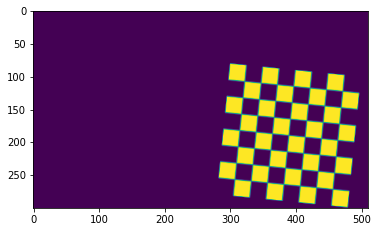

In [106]:
from skimage.transform import warp, AffineTransform
from skimage import data

image0= data.checkerboard() # image template (pattern to be found in the large image) 
tform = AffineTransform(rotation=0.1,translation=(300, 80))
image3 = warp(data.checkerboard()[:, :], tform.inverse,output_shape=(300, 510)) # large imatge (where to search the patterm)
plt.imshow(image3)

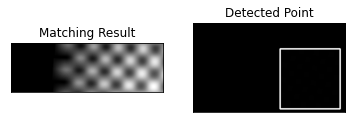

In [105]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = image3.astype('uint8')
template = image0
w, h = template.shape
# All the 6 methods for comparison in a list
method = eval(meth)
# Apply template Matching
method = eval('cv.TM_CCORR_NORMED')
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
img1 = cv.rectangle(img,top_left, bottom_right, 255, 3)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()